# Plotting of the custom & random bar charts as per the question

<IPython.core.display.Javascript object>


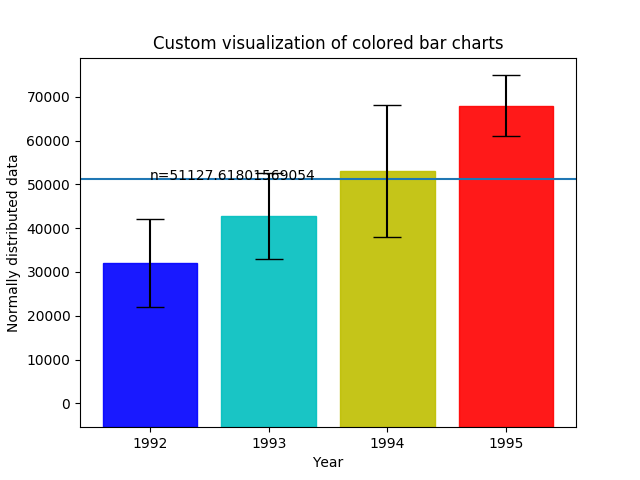

7

In [1]:
# EVEN HARDER OPTION

# Dark blue color for the distribution being certainly below this y-axis.
# Dark red if the value is certainly not contained as the distribution is above the axis.
# Yellow and cyan color depends upon the amount of data covered.
# To see the color changing pattern just click on the figure.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame(np.c_[np.random.normal(32000,10000,3650), 
                   np.random.normal(43000,10000,3650), 
                   np.random.normal(53500,15000,3650), 
                   np.random.normal(68000,7000,3650)], 
                   columns=[1992,1993,1994,1995])
plt.figure()
mean = df.mean()
std = df.std()
ax = plt.bar(range(len(df.columns)), mean+np.abs(df.values.min()), bottom = df.values.min() , yerr=std, align='center', edgecolor='black', alpha=0.9, capsize=10)

def onclick(event):
    plt.cla()
    mean = df.mean()
    std = df.std()
    val = event.ydata
    plt.axhline(y=val, zorder=1)
    plt.text(0, val, "n={}".format(val))
    ax = plt.bar(range(len(df.columns)), mean+np.abs(df.values.min()), bottom = df.values.min() , yerr=std, align='center', edgecolor='black', alpha=0.9, capsize=10);
    for i in df.columns:
        if val>df[i].std()+df[i].mean():
            ax[i-1992].set_color('b')
        elif val<df[i].mean()-df[i].std():
            ax[i-1992].set_color('r')
        elif df[i].mean()-df[i].std()<val and val<df[i].mean()+df[i].std():
            if df[i].mean()<val:
                ax[i-1992].set_color('c')
            if df[i].mean()>val:
                ax[i-1992].set_color('y')
    
    #plt.legend(['line', 'Blue', 'Red', 'Cyan', 'Yellow'])
    plt.xticks(range(len(df.columns)), df.columns)
    plt.xlabel('Year')
    plt.ylabel('Normally distributed data')
    plt.title('Custom visualization of colored bar charts')
    plt.show()

plt.gcf().canvas.mpl_connect('button_press_event', onclick)